# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [18]:
def bivariable(dataframe, x, y):
    df_tab = pd.crosstab(df[x], df[y], margins=True)
    df_tab['odds'] = df_tab[0] / df_tab[1]
    df_tab['RC_vs_all'] = df_tab['odds'] / df_tab.loc['All','odds']
    df_tab['logito'] = np.log(df_tab['odds'])
    df_tab['WOE'] = np.log(df_tab['RC_vs_all'])
    return df_tab

In [19]:
# CP
tab_cp = bivariable(df, 'cp', 'flag_doente')
tab_cp

flag_doente,0,1,All,odds,RC_vs_all,logito,WOE
cp,,,,,,,
1.0,16,7,23,2.285714,1.937282,0.826679,0.661286
2.0,41,9,50,4.555556,3.861111,1.516347,1.350955
3.0,68,18,86,3.777778,3.201897,1.329136,1.163743
4.0,39,105,144,0.371429,0.314808,-0.990399,-1.155791
All,164,139,303,1.179856,1.000000,0.165392,0.000000


In [20]:
tab_trestbps = bivariable(df, 'trestbps', 'flag_doente')
tab_trestbps

C:\Users\Caio\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


flag_doente,0,1,All,odds,RC_vs_all,logito,WOE
trestbps,,,,,,,
94.0,2,0,2,inf,inf,inf,inf
100.0,2,2,4,1.000000,0.847561,0.000000,-0.165392
101.0,1,0,1,inf,inf,inf,inf
102.0,2,0,2,inf,inf,inf,inf
104.0,1,0,1,inf,inf,inf,inf
105.0,3,0,3,inf,inf,inf,inf
106.0,1,0,1,inf,inf,inf,inf
108.0,4,2,6,2.000000,1.695122,0.693147,0.527755
110.0,8,11,19,0.727273,0.616408,-0.318454,-0.483846


In [21]:
#restecg
tab_restecg = bivariable(df, 'restecg', 'flag_doente')
tab_restecg

flag_doente,0,1,All,odds,RC_vs_all,logito,WOE
restecg,,,,,,,
0.0,95,56,151,1.696429,1.437827,0.528525,0.363133
1.0,1,3,4,0.333333,0.282520,-1.098612,-1.264005
2.0,68,80,148,0.850000,0.720427,-0.162519,-0.327911
All,164,139,303,1.179856,1.000000,0.165392,0.000000


### Qual delas parece discriminar mais o risco?

<p><b>A variável 'restecg' aparenta discriminar mais o risco.</b></p>

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [32]:
def bivariable_quant(df, val_exp, val_resp, n = 5):
    cat = pd.cut(x=df[val_exp], bins=n, right=True)
    df['cat'] = cat
    df_tab = pd.crosstab(df['cat'], df[val_resp], margins=True)
    df_tab['odds'] = df_tab[0] / df_tab[1]
    df_tab['RC_vs_all'] = df_tab['odds'] / df_tab.loc['All','odds']
    df_tab['logito'] = np.log(df_tab['odds'])
    df_tab['WOE'] = np.log(df_tab['RC_vs_all'])
    return df_tab

In [33]:
bivariable_quant(df, 'age', 'flag_doente')

flag_doente,0,1,All,odds,RC_vs_all,logito,WOE
cat,,,,,,,
"(28.952, 38.6]",8,3,11,2.666667,2.260163,0.980829,0.815437
"(38.6, 48.2]",50,21,71,2.380952,2.018002,0.867501,0.702108
"(48.2, 57.8]",56,41,97,1.365854,1.157644,0.311780,0.146387
"(57.8, 67.4]",40,67,107,0.597015,0.506007,-0.515813,-0.681206
"(67.4, 77.0]",10,7,17,1.428571,1.210801,0.356675,0.191282
All,164,139,303,1.179856,1.000000,0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [70]:
reglog = smf.logit('flag_doente ~ sex + C(cp) + ca + trestbps + age', data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.409920
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Mon, 28 Mar 2022   Pseudo R-squ.:                  0.4057
Time:                        15:48:41   Log-Likelihood:                -124.21
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.405e-31
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.5376      1.769     -4.261      0.000     -11.004      -4.071
C(cp)[T.2.0]     0.0288      0.700      0.041      0.967      -1.343       1.401
C(cp)[T.3.0]    -0.0556      0.640     -0.087      0.931      -1.309       1.198
C(cp)[T.4.0]     2.4135      0.609      3.964      0.000       1.220       3.607
ca[T.1.0]        1.9784      0.431      4.595      0.000       1.134       2.822
ca[T.2.0]        2.2791      0.562      4.057      0.000       1.178       3.380
ca[T.3.0]        2.3729      0.737      3.220      0.001       0.929       3.817
ca[T.?]         -0.1362      1.338     -0.102      0.919      -2.758       2.486
sex              1.7014      0.384      4.433      0.000       0.949       2.454
trestbps         0.0264      0.010      2.675      0.007       0.007       0.046
age              0.0119      0.020      0.579      0.563      -0.028       0.052
================================================================================
"""

<p><b> A variável CP não mostra muito relevância quando categorizada, já que os estados 2.0, 3.0 mostram um P-value perto de 1, já que não está categorizada mostra um bom P-value, mostrando relevância.</b></p>

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [71]:
# Calcule a probabilidade de evento predita segundo o seu modelo
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,cat,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(57.8, 67.4]",0.219731
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(57.8, 67.4]",0.981329
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(57.8, 67.4]",0.943416
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.952, 38.6]",0.116450
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(38.6, 48.2]",0.026699


In [72]:
# Categorize essa probabilidade em G=5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.00844, 0.107]    62
(0.107, 0.245]      59
(0.245, 0.581]      61
(0.581, 0.89]       61
(0.89, 0.982]       60
Name: predito, dtype: int64

In [73]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count()
qualid

,flag_doente
predito,
"(0.00844, 0.107]",62
"(0.107, 0.245]",59
"(0.245, 0.581]",61
"(0.581, 0.89]",61
"(0.89, 0.982]",60


In [74]:
# Calcule a probabilidade de evento predita média por grupo
qualid['predito'] = group_reg['predito'].mean()
qualid

,flag_doente,predito
predito,,
"(0.00844, 0.107]",62,0.051428
"(0.107, 0.245]",59,0.158796
"(0.245, 0.581]",61,0.414809
"(0.581, 0.89]",61,0.731407
"(0.89, 0.982]",60,0.942057


In [75]:
# Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
qualid['pct_sick'] = group_reg['flag_doente'].mean()
qualid

,flag_doente,predito,pct_sick
predito,,,
"(0.00844, 0.107]",62,0.051428,0.064516
"(0.107, 0.245]",59,0.158796,0.152542
"(0.245, 0.581]",61,0.414809,0.475410
"(0.581, 0.89]",61,0.731407,0.639344
"(0.89, 0.982]",60,0.942057,0.966667


Text(0.5, 0, 'Grupo')

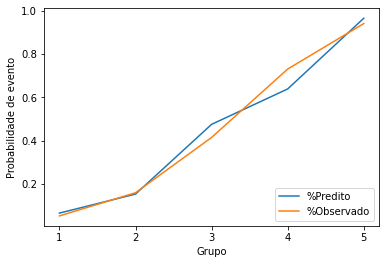

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_sick'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

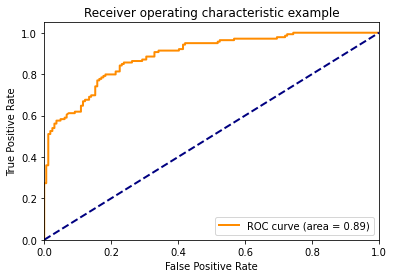

In [77]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

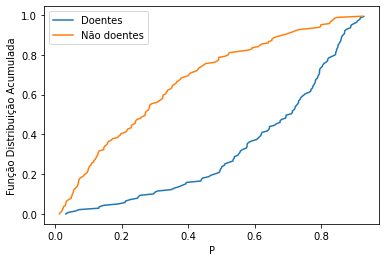

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não doentes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


In [78]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 61.83% 
AUC: 88.92% 
GINI: 77.84%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

<p><b>Após algumas tentativas o melhor modelo encontrado, foi com a adição da variável 'ca', número de vasos principais, mostrou um melhor número nos indicadores, principalmente no GINI.</b></p>